# Part 1: Option Valuation

## Ex. 1: Binomial tree program to approximate the price of the option. 
How does your estimate compare to the analytical value? <br>
Experiment for different values of the volatility

In [15]:
import math
from scipy.stats import norm
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [16]:
stock_price = 100.
strike_price = 99.0
interest_rate = 0.06
volatility = 0.20
steps = 50
T = 1 # maturity time in years

u = math.exp(volatility * math.sqrt(1/steps))
d = math.exp(-volatility * math.sqrt(1/steps))
a = math.exp(interest_rate * 1/steps)
p = (a - d) / (u - d)


''' The bionomial tree. ''' 
def binomial_tree(steps, start):
    ''' Binomial tree to approximate the price of the option. ''' 
    # Result includes stock price [0], option price [1], delta [2]
    results = [[[start, 0, 0]]]
    
    for i in range(steps): 
        result = []
        for j in range(len(results[-1])):
            # calculate the stock price [0]
            if j == 0:
                result.append([results[-1][j][0] * d, 0, 0])
            result.append([results[-1][j][0] * u, 0, 0])
        results.append(result)  
   
    return results


''' Approximate value with the european price call. ''' 
def call_option(S, K):
    ''' Calculates the value of a call option at its expiration date. '''
    return max(0, S - K)

def risk_neutral_valuation(r, dt, fi, fj, p): 
    ''' Risk-neutral valuation of the option. '''
    return math.exp(-r * dt) * (p * fi + (1 - p)*fj)

def price_EU_call(treelist, strike_price, p):
    ''' The price of the European call. '''
    lentree = len(treelist)
    
    # calculate the option prices [1]
    for el in treelist[-1]:
        el[1] = call_option(el[0], strike_price)
    
    # calculate risk neutral valuation: back in time [1]
    for i in range(len(treelist) - 2, -1, -1): # i is time
        for j in range(len(treelist[i])): # j is ????
            treelist[i][j][1] = risk_neutral_valuation(interest_rate, 1/(len(treelist)-1), treelist[i+1][j+1][1], treelist[i+1][j][1], p)
   
    return treelist


'''Analytical value'''
def black_scholes(stock_price, strike_price, interest_rate, volatility, T):
    d1 = (math.log(stock_price / strike_price) + (interest_rate + (volatility ** 2) / 2) * T) / (volatility * math.sqrt(T))
    #d2 = d1 - volatility* math.sqrt(T)
    d2 = (math.log(stock_price / strike_price) + (interest_rate - (volatility ** 2) / 2) * T) / (volatility * math.sqrt(T))
   
    call = stock_price * norm.cdf(d1) - strike_price * math.exp(- interest_rate * T) * norm.cdf(d2)
    put = strike_price * math.exp(-interest_rate * T ) * norm.cdf(-d2) - stock_price * norm.cdf(-d1)

    return call, put

In [17]:
''' The estimate compared to the analytical value '''
treelist = binomial_tree(steps, stock_price)
filled_tree = price_EU_call(treelist, strike_price, p)

#The estimate 
estimated_price = filled_tree[0][0][1]
print('The estimated price of the option:', estimated_price)

#The analytical value
analytical_call, analytical_put = black_scholes(stock_price, strike_price, interest_rate, volatility, T)
print('The analytical price of the option:', analytical_call)


The estimated price of the option: 11.546434850755034
The analytical price of the option: 11.544280227051097


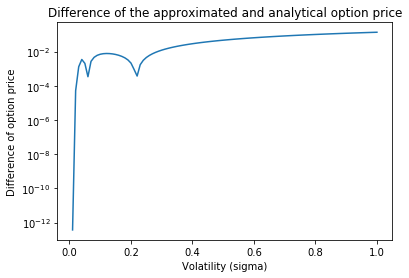

In [18]:
''' Different values of volatility '''
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

volatility = np.linspace(0.01,1,100)
estimated_prices = []
analytical_prices = []
for i in volatility: 
    
    u = math.exp(i * math.sqrt(1/steps))
    d = math.exp(-i * math.sqrt(1/steps))
    a = math.exp(interest_rate * 1/steps)
    p = (a - d) / (u - d)
    
    #print(i)
    
    treelist = binomial_tree(steps, stock_price)
    filled_tree = price_EU_call(treelist, strike_price, p)

    # Estimated  and analytical price
    estimated_prices.append(filled_tree[0][0][1])
    analytical_prices.append(black_scholes(stock_price, strike_price, interest_rate, i, T)[0])
    
#plt.plot(range(len(estimated_prices)), estimated_prices, label ='Estimated price')
#plt.plot(range(len(analytical_prices)), analytical_prices, label ='Analytical price')
plt.plot(volatility, [abs(analytical_prices[i] - estimated_prices[i]) for i in range(len(analytical_prices))])

plt.title('Difference of the approximated and analytical option price')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Difference of option price')
plt.yscale('log')
# plt.legend(loc = 'best')
plt.show()

## Ex. 2: Convergence of the method
What is the computational complexity of this algorithm? <br>
Done <br> 
Study the convergence of the method for increasing number of steps in the tree.

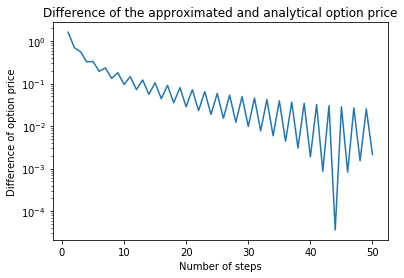

In [19]:
import matplotlib.pyplot as plt
import numpy as np

stock_price = 100.
strike_price = 99.0
interest_rate = 0.06
volatility = 0.20

T = 1 # maturity time in years
plt.figure()

steps = np.linspace(1,50)
estimated_prices = []
analytical_prices = []
for step in steps: 
    step = int(step)
    #print(step)
    u = math.exp(volatility * math.sqrt(1/step))
    d = math.exp(-volatility * math.sqrt(1/step))
    a = math.exp(interest_rate * 1/step)
    p = (a - d) / (u - d)
    
    treelist = binomial_tree(step, stock_price)
    filled_tree = price_EU_call(treelist, strike_price, p)

    # Estimated rmand analytical price
    estimated_prices.append(filled_tree[0][0][1])
    analytical_prices.append(black_scholes(stock_price, strike_price, interest_rate, volatility, T)[0])
    
#plt.plot(range(len(estimated_prices)), estimated_prices, label ='Estimated price')
#plt.plot(range(len(analytical_prices)), analytical_prices, label ='Analytical price')
plt.plot(steps, [abs(analytical_prices[i] - estimated_prices[i]) for i in range(len(analytical_prices))])

plt.title('Difference of the approximated and analytical option price')
plt.xlabel('Number of steps')
plt.ylabel('Difference of option price')
plt.yscale('log')
# plt.legend(loc = 'best')
plt.show()

In [64]:
'''Computational complexity'''
import matplotlib.pyplot as plt
import numpy as np
import time

stock_price = 100.
strike_price = 99.0
interest_rate = 0.06
volatility = 0.20

T = 1 # maturity time in years
plt.figure()

steps = np.linspace(1,500,500)
estimated_prices = []
analytical_prices = []
comp_times = []

print(steps)
comp_times_list = []
for iteration in range(50):
    for step in steps: 

        start = time.time()

        step = int(step)
        u = math.exp(volatility * math.sqrt(1/step))
        d = math.exp(-volatility * math.sqrt(1/step))
        a = math.exp(interest_rate * 1/step)
        p = (a - d) / (u - d)

        treelist = binomial_tree(step, stock_price)
        filled_tree = price_EU_call(treelist, strike_price, p)

        # Estimated  and analytical price
        estimated_prices.append(filled_tree[0][0][1])
        analytical_prices.append(black_scholes(stock_price, strike_price, interest_rate, volatility, T)[0])

        end = time.time()
        comp_times.append(end - start)
    comp_times_list.append(comp_times)


[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [ ]:
sorted_list = []
full_sorted_list = []
for i in range(500):
    for sample in comp_times_list:
        sorted_list.append(sample[i])
    full_sorted_list.append(np.mean(sorted_list))

In [ ]:
#Computing time
plt.plot(steps, full_sorted_list)
plt.title('Computing time')
plt.xlabel('Steps')
plt.ylabel('Seconds')
plt.legend(loc = 'best')
plt.show()

## Ex. 3: Hedge parameter
Compare with the analytical values. 
Experiment for different values of the volatility.

In [60]:
''' The estimation of delta. '''
def estimate_delta(treelist):
    lentree = len(treelist)
    
    for i in range(len(treelist) - 2, -1, -1): # i is time
        for j in range(len(treelist[i])): # j is ????
            treelist[i][j][2] = (treelist[i+1][j+1][1] - treelist[i+1][j][1]) / (treelist[i+1][j+1][0] - treelist[i+1][j][0])
 
    return treelist
            
#SAME CALCULATIOIN, DIFFERENT METHOD TO ESTIMATE THE DELTA
def calc_delta(treelist):
    lentree = len(treelist)
    for j in range(lentree - 1):
        for k in range(len(treelist[-(j+2)])):
            treelist[-(j+2)][k][2] = (treelist[-(j+1)][k][1] - treelist[-(j+1)][k+1][1]) / (treelist[-(j+1)][k][0] - treelist[-(j+1)][k+1][0])
#             if j == 0 and k ==0:
#                 print(treelist[-(j+1)][k][1], treelist[-(j+1)][k+1][1], treelist[-(j+2)][k][1])
    return treelist


''' The analytical delta. '''
def analytical_delta(current_stock_price, strike_price, interest_rate, volatility, T, t, steps):
    d1 = (math.log(current_stock_price / strike_price) + (interest_rate + (volatility ** 2) / 2) * T*(1-t/steps)) / (volatility * math.sqrt(T*(1-t/steps)))
    return norm.cdf(d1) 

In [61]:
steps = 50

''' The estimate compared to the analytical value. '''
# The estimate 
estimated_deltas = estimate_delta(filled_tree)
print(estimated_deltas[0])

b = calc_delta(filled_tree)
print(b[0])

# The analytical
current_stock_price = 100
t = 0
anal_delta = analytical_delta(current_stock_price, strike_price, interest_rate, volatility, T, t, steps)
#  d1 = (math.log(b[t][20][0] / strike_price) + (interest_rate + (volatility ** 2) / 2) * T*(1-t/steps) / (volatility * math.sqrt(T*(1-t/steps))))
# print(norm.cdf(d1))

print(anal_delta)


[[100.0, 99.99999999999781, 0.9999999999999782]]
[[100.0, 99.99999999999781, 0.9999999999999782]]
[1.         0.90124599 0.75364615 0.69274118 0.66506908 0.65212729
 0.64684545 0.6460113  0.64796623 0.65176895 0.65684525 0.66282425
 0.66945503 0.6765611  0.68401418 0.69171839 0.69960023 0.70760215
 0.71567822]


C:\Python36\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


In [63]:
list_estimated_deltas = []
list_anal_deltas = []
steps = 365
stock_price = 100.
strike_price = 99.0
interest_rate = 0.06
# volatility = 0.20

T = 1 # maturity time in years
t = 0

for i in range(1,50):
    #Estimated deltas
    u = math.exp(i * math.sqrt(1/steps))
    d = math.exp(-i * math.sqrt(1/steps))
    a = math.exp(interest_rate * 1/steps)
    p = (a - d) / (u - d)

    treelist = binomial_tree(steps, stock_price)
    filled_tree = price_EU_call(treelist, strike_price, p)
    
    estimated_deltas = estimate_delta(filled_tree)
    list_estimated_deltas.append(estimated_deltas[0][0][2])
#     print(list_estimated_deltas)


    #Analytical deltas
    t = 0
    anal_deltas = analytical_delta(stock_price, strike_price, interest_rate, i, T, t, steps)
    list_anal_deltas.append(anal_deltas)
    
    print(estimated_deltas[0][0][2])
    print(anal_deltas)
    print(i)
    print('')
   
    
    
# plt.plot(list_estimated_deltas[-1], label = 'approximated delta')
# plt.plot(list_anal_deltas, label = 'analytical delta')

volatility = np.linspace(0,1,len(list_anal_deltas))
plt.plot(volatility, [abs(list_anal_deltas[i] - list_estimated_deltas[i]) for i in range(len(list_anal_deltas))])
plt.title('Difference of the approximated and analytical deltas')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Difference of deltas')
plt.yscale('log')
# plt.legend(loc = 'best')
plt.show()

0.7157388522307266
0.7156782208205362
1

0.8497634303380381
0.8496714211660529
2

0.9361922898887
0.936164431937323
3

0.9781543982982647
0.9781789754287795
4

0.9940002794629812
0.9940316486776197
5

0.9986834038962595
0.9987009472513865
6

0.9997697136309779
0.9997759527121108
7

0.9999679304608217
0.9999694803153918
8

0.9999964444786438
0.9999967245795536
9

0.9999996859149207
0.9999997235825909
10

0.9999999778602856
0.9999999816844024
11

0.9999999987521055
0.9999999990482663
12

0.9999999999435945
0.9999999999612535
13

0.9999999999979349
0.9999999999987651
14

0.9999999999999283
0.9999999999999692
15

0.9999999999999818
0.9999999999999994
16

1.0000000000000036
1.0
17

0.9999999999999903
1.0
18

0.9999999999999782
1.0
19

0.9999999999999937
1.0
20

1.0000000000000082
1.0
21

0.9999999999999698
1.0
22

0.9999999999999732
1.0
23

0.9999999999999555
1.0
24

1.0000000000000213
1.0
25

1.0000000000000013
1.0
26

0.9999999999999782
1.0
27

0.9999999999999627
1.0
28

0.999999999999961

ZeroDivisionError: float division by zero

## Ex. 4: American option 
What is the value of the American put and call for the corresponding parameters? <br>
Experiment for different values of the volatility.

In [14]:
''' American call option. ''' 
def price_US_call(treelist, strike_price, p):
    lentree = len(treelist)
    for el in treelist[-1]:
        el[1] = call_option(el[0], strike_price)
        
    for i in range(lentree - 1):
        for j in range(len(treelist[-(i+2)])):
            keeping_value = risk_neutral_valuation(interest_rate, 1/steps, treelist[-(i+1)][j+1][1], treelist[-(i+1)][j][1], p)
            use_now_value = call_option(treelist[-(i+2)][j][0], strike_price)
            
            treelist[-(i+2)][j][1] = max(keeping_value, use_now_value)

    return treelist


''' American put option. ''' 
def put_option(S, K ): 
    ''' Calculates the value of a put option at its expiration date. '''
    return max(0, K - S)

def price_US_put(treelist, strike_price, p):
    lentree = len(treelist)
    for el in treelist[-1]:
        el[1] = put_option(el[0], strike_price)
        
    for i in range(lentree - 1):
        for j in range(len(treelist[-(i+2)])):
            keeping_value = risk_neutral_valuation(interest_rate, 1/steps, treelist[-(i+1)][j+1][1], treelist[-(i+1)][j][1], p)
            use_now_value = put_option(treelist[-(i+2)][j][0], strike_price)
            
            treelist[-(i+2)][j][1] = max(keeping_value, use_now_value)

    return treelist
    

In [15]:
''' The American put and call option. '''
treelist = binomial_tree(steps, stock_price)

treelist2 = binomial_tree(steps, stock_price)
call_US = price_US_call(treelist, strike_price, p)
put_US = price_US_put(treelist2, strike_price, p)

print('The American call option: ', call_US[0][0][1])
print('The American put option:', put_US[0][0][1])
# Call is altijd meer waard dan een put 


The American call option:  11.546434850755034
The American put option: 5.3477634984176605


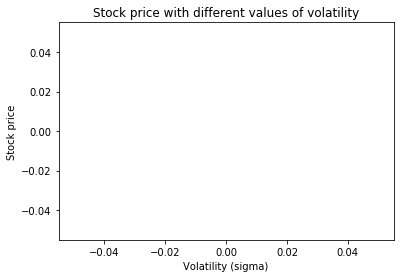

In [16]:
''' Different values of volatility. '''

plt.plot()
plt.title('Stock price with different values of volatility')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Stock price')
plt.show()

# Part 2: Hedging Simulations

In [65]:
stock_price = 100.0
strike_price = 99
interest_rate = 0.06
volatility = 0.2
stock_volatility = 0.1
T = 1
steps = 365

u = math.exp(volatility * math.sqrt(1/steps))
d = math.exp(-volatility * math.sqrt(1/steps))
a = math.exp(interest_rate * 1/steps)
p = (a - d) / (u - d)


def dynamics_stock_price(r, S, dt, sigma):
    ''' The dynamics of the stock price S. '''
    dZ = np.random.normal() * math.sqrt(dt)

    return S + r*S*dt + sigma * S * dZ


''' The analytical delta. '''
def analytical_delta(current_stock_price, strike_price, interest_rate, volatility, T, t, steps):
    #print((steps - t)/steps)
    d1 = (math.log(current_stock_price / strike_price) + (interest_rate + (volatility ** 2) / 2) * ((steps - t)/steps)) / (volatility * math.sqrt((steps - t)/steps))
    return norm.cdf(d1) 


stock_over_time = [stock_price]
anal_delta = []
for t in range(steps):
    stock_over_time.append(dynamics_stock_price(interest_rate, stock_over_time[t], T/steps, stock_volatility))
    anal_delta.append(analytical_delta(stock_over_time[t], strike_price, interest_rate, volatility, T, t, steps))

In [66]:
call_prices = []
for i in range(steps):
    call, put = black_scholes(stock_over_time[i], strike_price, interest_rate, volatility, T*(1-i/steps))
    call_prices.append(call)

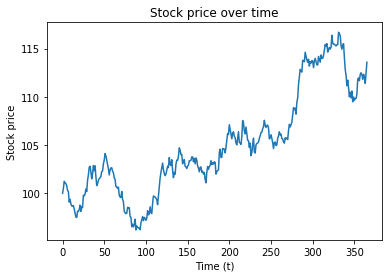

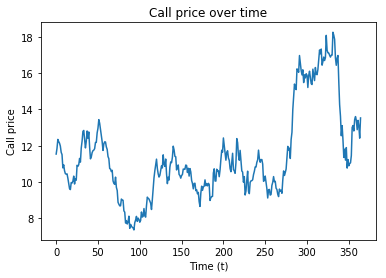

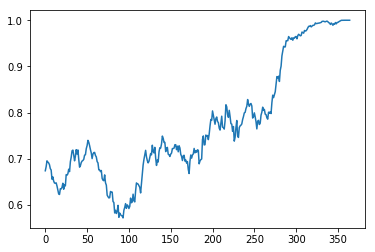

In [67]:
#Plot of the stock price over time
plt.plot(stock_over_time)
plt.title('Stock price over time')
plt.xlabel('Time (t)')
plt.ylabel('Stock price')
plt.show()

plt.plot(call_prices)
plt.title('Call price over time')
plt.xlabel('Time (t)')
plt.ylabel('Call price')
plt.show()

plt.plot(anal_delta)
plt.show()

## VRAAG 1: Vary the frequency of the hedge adjustment (from daily to weekly) and explain the results

In [68]:
hedgetime = 1 #1 OF 7 VERANDEREN EN DAAR PLOT VAN MAKEN - VERSCHIL VERKLAREN

money = []
call_value = []
delta_list = []
folio_price = []
interest_loss = 0
loss_per_time = []
for i in range(steps):
    if i == 0:
        call_value.append(call_prices[i])
        delta_list.append(anal_delta[i])
        folio_price.append(anal_delta[i] * stock_over_time[i])
        money.append(call_prices[i] - anal_delta[i] * stock_over_time[i])
    elif i%hedgetime == 0:
        call_value.append(call_prices[i])
        money.append(money[-1] * ((1 + interest_rate)**(hedgetime/steps)) - (anal_delta[i] - delta_list[-1]) * stock_over_time[i])
        interest_loss = interest_loss + money[-1] * (1 + interest_rate)**(hedgetime/steps) - money[-1]
        loss_per_time
        delta_list.append(anal_delta[i])
        folio_price.append(anal_delta[i] * stock_over_time[i])
        
#print(money)
#print(call_value)
#print(delta_list)
#print(folio_price)
money[-1] = money[-1] - max(0, stock_over_time[-1] - strike_price)
        

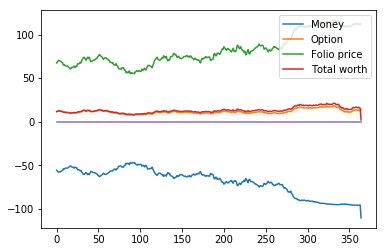

In [69]:
total_worth = [money[i] + folio_price[i] for i in range(len(money))]
plt.plot(range(len(money)), money, label = "Money")
plt.plot(range(len(money)), call_value, label= "Option")
#plt.plot(range(len(money)), delta_list = "")
plt.plot(range(len(money)), folio_price, label = "Folio price")
plt.plot(range(len(money)), total_worth, label = "Total worth")

horiz_line_data = np.array([i for i in range(365)])
xs = [0 for i in range(365)]
plt.plot(horiz_line_data, xs) 

plt.legend()
plt.show()

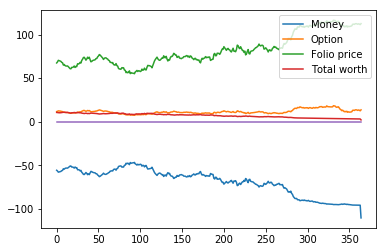

In [70]:
total_worth = [money[i] + folio_price[i] if i + 1 == len(money) else money[i] + folio_price[i] - max(0, stock_over_time[i] - strike_price) for i in range(len(money))]
plt.plot(range(len(money)), money, label = "Money")
plt.plot(range(len(money)), call_value, label= "Option")
#plt.plot(range(len(money)), delta_list = "")
plt.plot(range(len(money)), folio_price, label = "Folio price")
plt.plot(range(len(money)), total_worth, label = "Total worth")

horiz_line_data = np.array([i for i in range(365)])
xs = [0 for i in range(365)]
plt.plot(horiz_line_data, xs) 

plt.legend()
plt.show()

In [ ]:
end_change = []
stock_volatility = 0.1
volatility = 0.2
for i in range(1000):
    if i%100 == 0:
        print(i)
    stock_over_time = [stock_price]
    anal_delta = []
    for t in range(steps):
        stock_over_time.append(dynamics_stock_price(interest_rate, stock_over_time[t], T/steps, stock_volatility))
        anal_delta.append(analytical_delta(stock_over_time[t], strike_price, interest_rate, volatility, T, t, steps))
        
    call_prices = []
    for i in range(steps):
        call, put = black_scholes(stock_over_time[i], strike_price, interest_rate, volatility, T*(1-i/steps))
        call_prices.append(call)
        
    money = []
    call_value = []
    delta_list = []
    folio_price = []

    for i in range(steps):
        if i == 0:
            call_value.append(call_prices[i])
            delta_list.append(anal_delta[i])
            folio_price.append(anal_delta[i] * stock_over_time[i])
            money.append(call_prices[i] - anal_delta[i] * stock_over_time[i])
        elif i%hedgetime == 0:
            call_value.append(call_prices[i])
            money.append(money[-1] * (1 + interest_rate)**(hedgetime/steps) - (anal_delta[i] - delta_list[-1]) * stock_over_time[i])
            delta_list.append(anal_delta[i])
            folio_price.append(anal_delta[i] * stock_over_time[i])
        
    money[-1] = money[-1] - max(0, stock_over_time[-1] - strike_price)

    end_change.append(money[-1] + folio_price[-1])

print(end_change)

plt.hist(end_change)
plt.show()

0


In [ ]:
CI = stats.norm.interval(0.95, loc = np.mean(end_change), scale = np.std(end_change)) # TODO: check this
plt.axvline(CI[0], color = 'r')
plt.axvline(CI[1], color = 'r')
plt.hist(end_change, bins = 40)
plt.ylabel('Observations')
plt.xlabel('Profit/Loss')
plt.title('Profit or loss after hedging using stocks and a call option (new delta time = 1)')
plt.show()

In [ ]:
CI

In [ ]:
count = 0
for i in end_change:
    if i > 2.1131491370043816 or i < -1.9286610850368464:
        count = count + 1
print(count)

In [ ]:
np.mean(end_change)